In [79]:
from Bio import SeqIO
from Bio.Seq import Seq

import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

from mpl_toolkits.mplot3d import Axes3D


#TODO: sorted function does not work correctly







In [2]:
fasta_file = "../data/E.Coli/GCA_000005845.2/cds_from_genomic.fna"

In [3]:
records = []
for record in SeqIO.parse(fasta_file, format="fasta"):
    records.append(str(record.seq))


In [4]:
from itertools import product
from collections import defaultdict as ddict

codon_list = ["".join(i) for i in list(product("TCAG", repeat=3))]

translation_table = ddict(list)
for codon in codon_list:
    tr = str(Seq(codon).translate())
    translation_table[tr].append(str(codon))

print("codon_list", codon_list)
print("\ntranslation_table", dict(translation_table))

codon_list ['TTT', 'TTC', 'TTA', 'TTG', 'TCT', 'TCC', 'TCA', 'TCG', 'TAT', 'TAC', 'TAA', 'TAG', 'TGT', 'TGC', 'TGA', 'TGG', 'CTT', 'CTC', 'CTA', 'CTG', 'CCT', 'CCC', 'CCA', 'CCG', 'CAT', 'CAC', 'CAA', 'CAG', 'CGT', 'CGC', 'CGA', 'CGG', 'ATT', 'ATC', 'ATA', 'ATG', 'ACT', 'ACC', 'ACA', 'ACG', 'AAT', 'AAC', 'AAA', 'AAG', 'AGT', 'AGC', 'AGA', 'AGG', 'GTT', 'GTC', 'GTA', 'GTG', 'GCT', 'GCC', 'GCA', 'GCG', 'GAT', 'GAC', 'GAA', 'GAG', 'GGT', 'GGC', 'GGA', 'GGG']

translation_table {'F': ['TTT', 'TTC'], 'L': ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'], 'S': ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'], 'Y': ['TAT', 'TAC'], '*': ['TAA', 'TAG', 'TGA'], 'C': ['TGT', 'TGC'], 'W': ['TGG'], 'P': ['CCT', 'CCC', 'CCA', 'CCG'], 'H': ['CAT', 'CAC'], 'Q': ['CAA', 'CAG'], 'R': ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'], 'I': ['ATT', 'ATC', 'ATA'], 'M': ['ATG'], 'T': ['ACT', 'ACC', 'ACA', 'ACG'], 'N': ['AAT', 'AAC'], 'K': ['AAA', 'AAG'], 'V': ['GTT', 'GTC', 'GTA', 'GTG'], 'A': ['GCT', 'GCC', 'GCA', 'GCG'], 'D

In [5]:
translation_table["S"]

['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC']

In [6]:
def visualize_plotly(record, selected_aa):
    selected_codons = translation_table[selected_aa]
    codons = [record[i:i + 3] for i in range(0, len(record), 3)]

    data = {"codon": codons,
            "translation": [str(Seq(c).translate()) for c in codons],
            "codon_id": [selected_codons.index(c) if c in selected_codons else -1 for c in codons],
            "all_codon_id": [codon_list.index(c) for c in codons]
            }

    df = pd.DataFrame(data)
    
    fig = px.imshow([df["codon_id"]], aspect="auto", height=300)
    fig.show()

    fig = go.Figure(go.Heatmap(
        z=[df["codon_id"]],
        colorscale="rainbow"),
    )
    fig.show()


visualize_plotly(records[2], selected_aa="A")

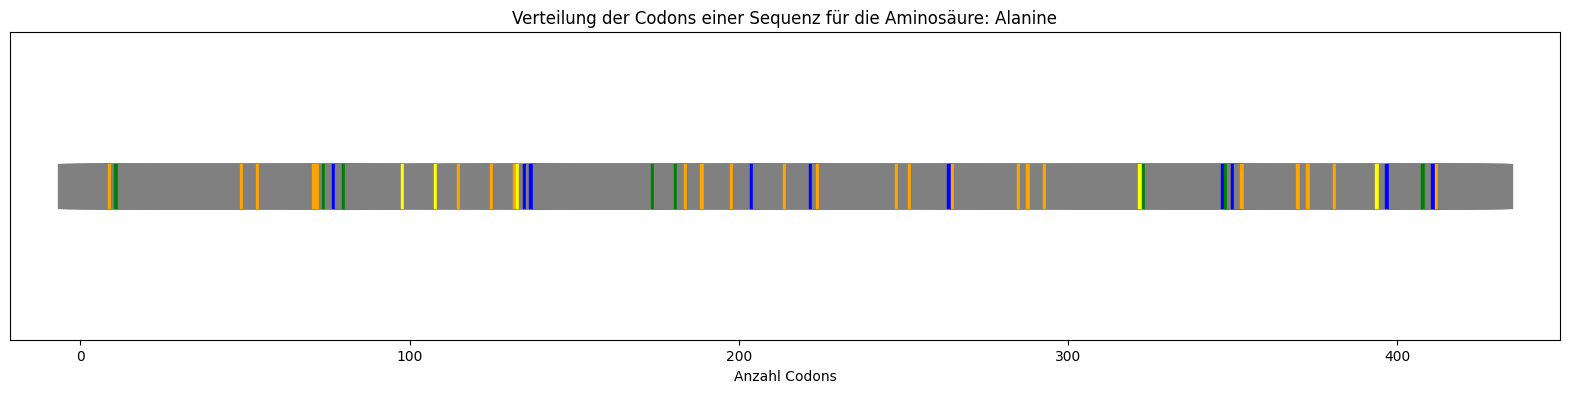

Color Counts:
gray: 382
orange: 24
green: 8
blue: 10
yellow: 5


In [7]:
from collections import Counter

def visualize_mpl(record, selected_aa):
    selected_codons = translation_table[selected_aa]
    codons = [record[i:i + 3] for i in range(0, len(record), 3)]
    codon_ids = [selected_codons.index(c) if c in selected_codons else -1 for c in codons]

    unique_codon_ids = list(set(codon_ids))
    colors = ['red', 'blue', 'green', 'yellow', 'orange'] 

    # Create a list to hold the colors for each index
    color_list = [colors[idx + 1] if idx >= 0 else 'gray' for idx in codon_ids]

    # Plotting
    plt.figure(figsize=(20, 4))
    plt.scatter(range(len(codon_ids)), [1] * len(codon_ids), color=color_list, s=1000, marker='s')
    plt.xlabel('Anzahl Codons')
    plt.title('Verteilung der Codons einer Sequenz für die Aminosäure: Alanine')
    plt.yticks([])  # Hide y-axis ticks
    plt.show()

    # Count the occurrence of each color
    color_counts = Counter(color_list)
    print("Color Counts:")
    for color, count in color_counts.items():
        print(f"{color}: {count}")

visualize_mpl(records[3], selected_aa="A")

max_len 2359 avg_len 404


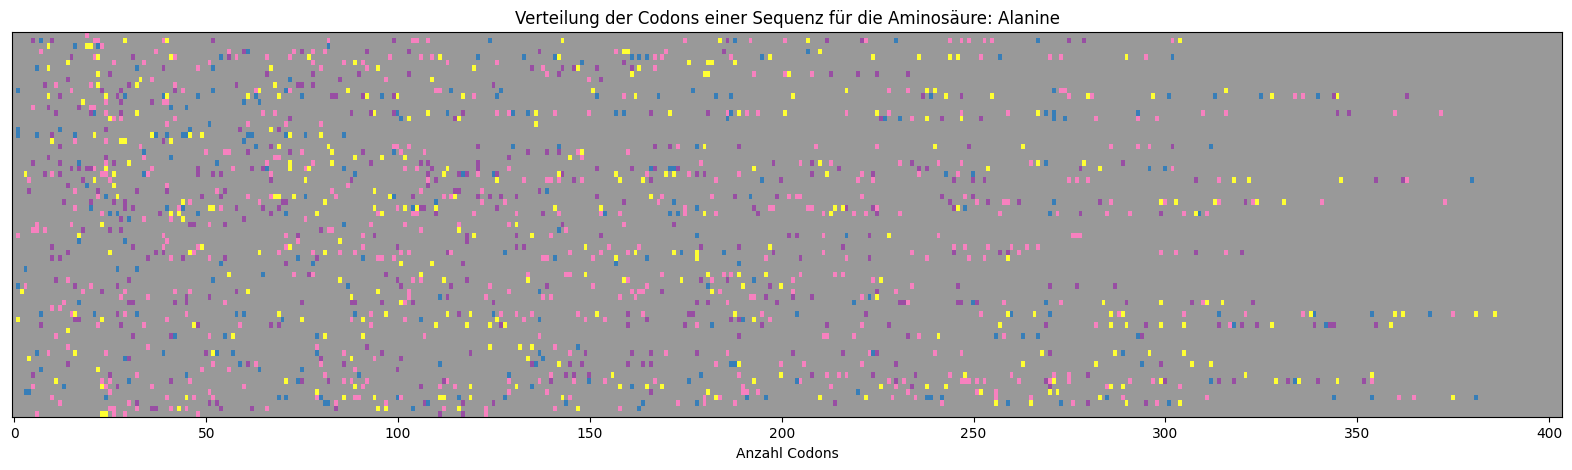

In [8]:
def visualize_mpl(records, selected_aa, show_records, len_threshold=1.3):
    color_matrix = []

    max_len = max(len(record) for record in records) // 3
    avg_len = (sum(len(record) for record in records) // 3) / len(records)
    len_threshold = int(avg_len * len_threshold)

    print("max_len", max_len, "avg_len", len_threshold)

    for record in records[:show_records]:
        #if len(record) is a outlier, we can skip it:
        if len(record) // 3 > len_threshold:
            continue

        selected_codons = translation_table[selected_aa]
        codons = [record[i:i + 3] for i in range(0, len(record), 3)]
        codon_ids = [selected_codons.index(c) if c in selected_codons else -1 for c in codons]

        color_out_of_reach = 1000
        # Create a list to hold the color indices for each codon
        color_indices = [idx + 1 if idx >= 0 else color_out_of_reach for idx in codon_ids]

        # Pad color_indices with -1 to make it the same length as max_len
        color_indices += [color_out_of_reach] * (len_threshold - len(color_indices))


        color_matrix.append(color_indices)


    # Convert color_matrix to a 2D numpy array
    color_matrix = np.array(color_matrix)

    # Plotting
    plt.figure(figsize=(20, 5))
    plt.imshow(color_matrix, aspect='auto', cmap='Set1', vmin=0, vmax=5)
    plt.xlabel('Anzahl Codons')
    plt.title('Verteilung der Codons einer Sequenz für die Aminosäure: Alanine')
    plt.yticks([])  # Hide y-axis ticks
    plt.show()

visualize_mpl(records, show_records=100, selected_aa="A")

max_len 2359 avg_len 404


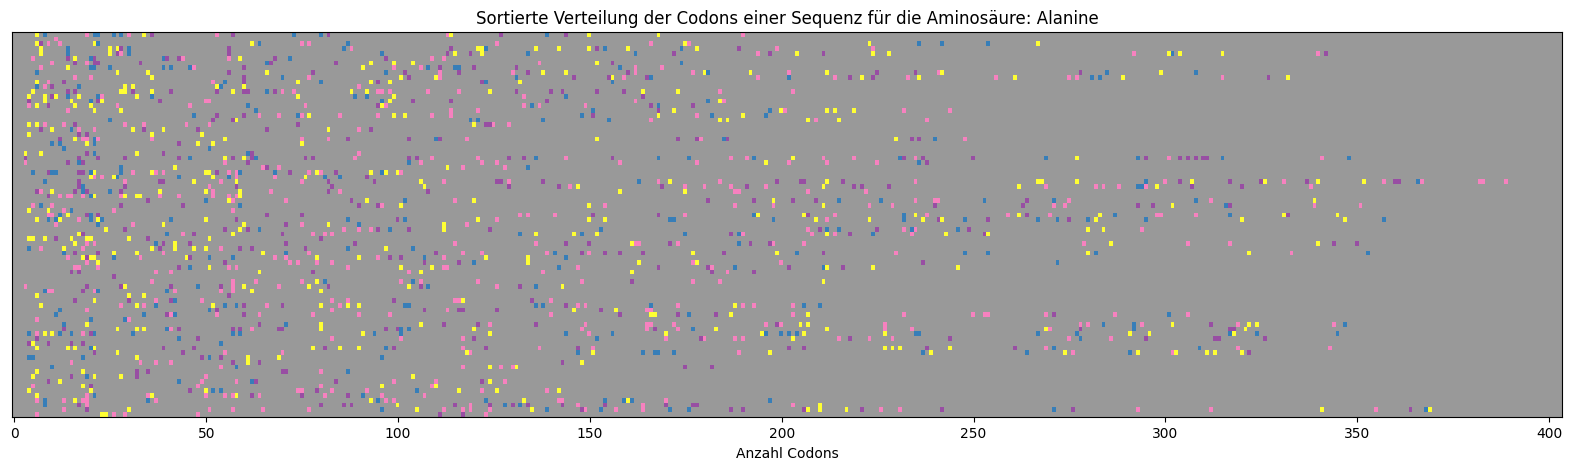

In [9]:
def visualize_mpl(records, selected_aa, show_records, len_threshold=1.3):
    color_matrix = []

    max_len = max(len(record) for record in records) // 3
    avg_len = (sum(len(record) for record in records) // 3) / len(records)
    len_threshold = int(avg_len * len_threshold)

    print("max_len", max_len, "avg_len", len_threshold)

    #sort the records
    sorted_records = sorted(records)

    for record in sorted_records[:show_records]:
        #if len(record) is a outlier, we can skip it:
        if len(record) // 3 > len_threshold:
            continue

        selected_codons = translation_table[selected_aa]
        codons = [record[i:i + 3] for i in range(0, len(record), 3)]
        codon_ids = [selected_codons.index(c) if c in selected_codons else -1 for c in codons]

        color_out_of_reach = 1000
        # Create a list to hold the color indices for each codon
        color_indices = [idx + 1 if idx >= 0 else color_out_of_reach for idx in codon_ids]

        # Pad color_indices with -1 to make it the same length as max_len
        color_indices += [color_out_of_reach] * (len_threshold - len(color_indices))


        color_matrix.append(color_indices)


    # Convert color_matrix to a 2D numpy array
    color_matrix = np.array(color_matrix)

    # Plotting
    plt.figure(figsize=(20, 5))
    plt.imshow(color_matrix, aspect='auto', cmap='Set1', vmin=0, vmax=5)
    plt.xlabel('Anzahl Codons')
    plt.title('Sortierte Verteilung der Codons einer Sequenz für die Aminosäure: Alanine')
    plt.yticks([])  # Hide y-axis ticks
    plt.show()

visualize_mpl(records, show_records=100, selected_aa="A")

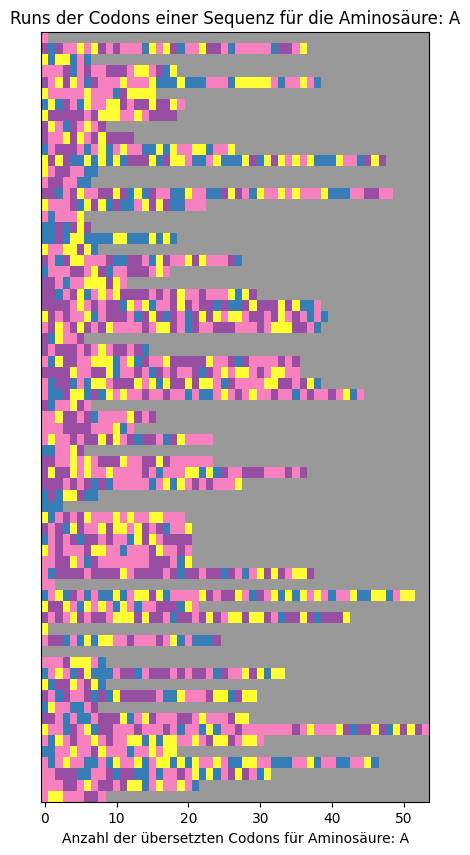

In [10]:
def visualize_mpl(records, selected_aa, show_records, len_threshold=1.3):
    color_matrix = []
    color_out_of_reach = 1000

    avg_len = (sum(len(record) for record in records) // 3) / len(records)
    max_len = int(avg_len * len_threshold)

    for record in records[:show_records]:
        #if len(record) is a outlier, we can skip it:
        if len(record) // 3 > max_len:
            continue

        selected_codons = translation_table[selected_aa]
        codons = [record[i:i + 3] for i in range(0, len(record), 3)]
        codon_ids = [selected_codons.index(c) for c in codons if c in selected_codons]
    
        # Create a list to hold the color indices for each codon
        color_indices = [idx + 1 if idx >= 0 else color_out_of_reach for idx in codon_ids]

        color_matrix.append(color_indices)

    # get max length of color_matrix
    max_len = max(len(c_m) for c_m in color_matrix)
    # padding color_matrix
    color_matrix = [color_indices + [color_out_of_reach] * (max_len - len(color_indices)) for color_indices in color_matrix]

    # Convert color_matrix to a 2D numpy array
    color_matrix = np.array(color_matrix)

    # Plotting
    plt.figure(figsize=(5, 10))
    plt.imshow(color_matrix, aspect='auto', cmap='Set1', vmin=0, vmax=5)
    plt.xlabel(f'Anzahl der übersetzten Codons für Aminosäure: {selected_aa}')
    plt.title(f'Runs der Codons einer Sequenz für die Aminosäure: {selected_aa}')
    plt.yticks([])  # Hide y-axis ticks
    plt.show()

visualize_mpl(records, show_records=100, selected_aa="A")

sorted_aa ['FSYAGDKNRQLTRYSDTRWHEDSVRNRWFSVMVGPSVRVNEWFSAYAMAGMAYSRVSTFSGDYLRVTDNKKGKTHDVLTGSDDGRHSNTSLAWGAGVQFNPTESVAIDIAYEGPGSGDWRTDGFIVGVGYKF*', 'IFTRVANFCRKVLSREESEAEQAVARPQVTVIPREQHAISRKDISENALKVMYRLNKAGYEAWLVGGGVRDLLLGKKPKDFDVTTNATPEQVRKLFRNCRLVGRRFRLAHVMFGPEIIEVATFRGHHEGNVSDRTTSQRGQNGMLLRDNIFGSIEEDAQRRDFTINSLYYSVADFTVRDYVGGMKDLKDGVIRLIGNPETRYREDPVRMLRAVRFAAKLGMRISPETAEPIPRLATLLNDIPPARLFEESLKLLQAGYGYETYKLLCEYHLFQPLFPTITRYFTENGDSPMERIIEQVLKNTDTRIHNDMRVNPAFLFAAMFWYPLLETAQKIAQESGLTYHDAFALAMNDVLDEACRSLAIPKRLTTLTRDIWQLQLRMSRRQGKRAWKLLEHPKFRAAYDLLALRAEVERNAELQRLVKWWGEFQVSAPPDQKGMLNELDEEPSPRRRTRRPRKRAPRREGTA*', 'IKGGKRVQTARPNRINGEIRAQEVRLTGLEGEQLGIVSLREALEKAEEAGVDLVEISPNAEPPVCRIMDYGKFLYEKSKSSKEQKKKQKVIQVKEIKFRPGTDEGDYQVKLRSLIRFLEEGDKAKITLRFRGREMAHQQIGMEVLNRVKDDLQELAVVESFPTKIEGRQMIMVLAPKKKQ*', 'ITNHIHFRCPCCHGSQYRTSSFDVSDMNPFGAKCIFCKSMMITFDNISQYLNASRLSLDLKK*', 'ITQHLHFRCPCCHGSQYRTSAFDVTERNPLGAKCIFCKSTMITFDNVALQIRTDHAPLDFTK*', 'LADKAILWALISASTKEGRKACSLSYFACKAAEAELGLAYMAANDNKEFLTSLSNIMRYKID

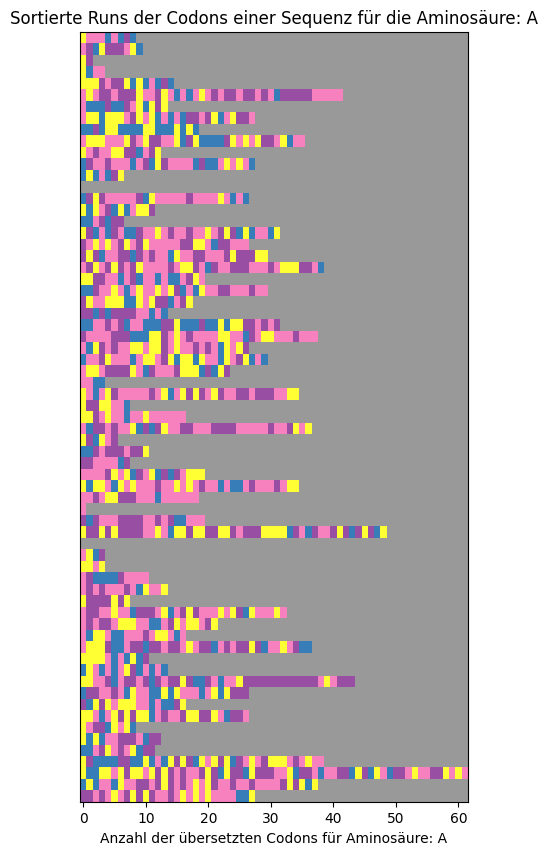

In [20]:
def visualize_mpl(records, selected_aa, show_records, len_threshold=1.3):
    color_matrix = []
    color_out_of_reach = 1000

    avg_len = (sum(len(record) for record in records) // 3) / len(records)
    max_len = int(avg_len * len_threshold)


    #translate the records to amino acids for sorting
    records_aa = [str(Seq(record).translate()) for record in records]
    #create a list of tuples of translated aa and original sequence
    records_aa_zip = list(zip(records_aa, records))
    # sort the records based on the translated aa
    sorted_zip = sorted(records_aa_zip, key=lambda x: x[0])
    #unzip the list of tuples
    sorted_records = [x[1] for x in sorted_zip]
    sorted_aa = [x[0] for x in sorted_zip]
    print("sorted_aa", sorted_aa)
    #sort after length
    #sorted_records = sorted(sorted_records[:show_records], key=len)

    for record in sorted_records[:show_records]:
        #if len(record) is a outlier, we can skip it:
        if len(record) // 3 > max_len:
            continue

        selected_codons = translation_table[selected_aa]
        codons = [record[i:i + 3] for i in range(0, len(record), 3)]
        codon_ids = [selected_codons.index(c) for c in codons if c in selected_codons]
    
        # Create a list to hold the color indices for each codon
        color_indices = [idx + 1 if idx >= 0 else color_out_of_reach for idx in codon_ids]

        color_matrix.append(color_indices)

    # get max length of color_matrix
    max_len = max(len(c_m) for c_m in color_matrix)
    # padding color_matrix
    color_matrix = [color_indices + [color_out_of_reach] * (max_len - len(color_indices)) for color_indices in color_matrix]

    # Convert color_matrix to a 2D numpy array
    color_matrix = np.array(color_matrix)

    # Plotting
    plt.figure(figsize=(5, 10))
    plt.imshow(color_matrix, aspect='auto', cmap='Set1', vmin=0, vmax=5)
    plt.xlabel(f'Anzahl der übersetzten Codons für Aminosäure: {selected_aa}')
    plt.title(f'Sortierte Runs der Codons einer Sequenz für die Aminosäure: {selected_aa}')
    plt.yticks([])  # Hide y-axis ticks
    plt.show()

visualize_mpl(records, show_records=100, selected_aa="A")

{'GCT': 'red', 'GCC': 'blue', 'GCA': 'green', 'GCG': 'orange', 'padding': 'grey'}


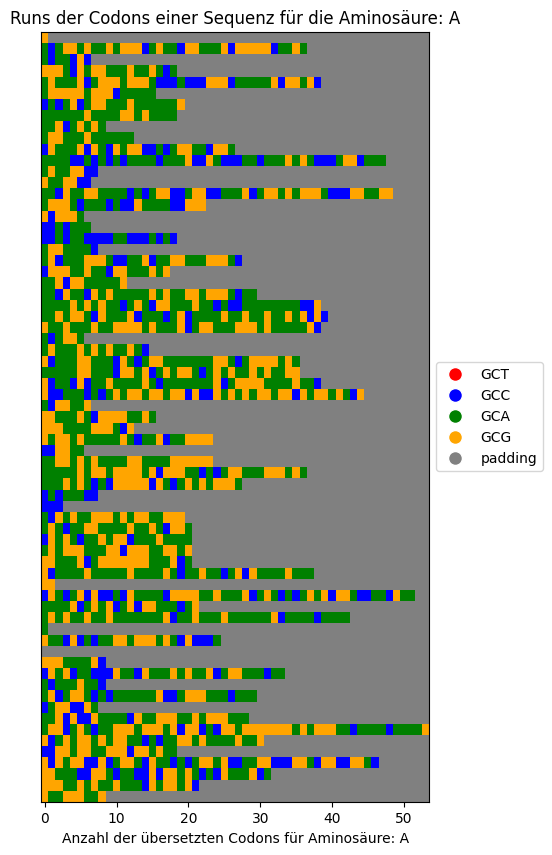

In [12]:
def visualize_mpl(records, selected_aa, show_records, len_threshold=1.3):
    color_matrix = []
    color_out_of_reach = 1000

    avg_len = (sum(len(record) for record in records) // 3) / len(records)
    max_len = int(avg_len * len_threshold)

    for record in records[:show_records]:
        #if len(record) is a outlier, we can skip it:
        if len(record) // 3 > max_len:
            continue

        selected_codons = translation_table[selected_aa]
        codons = [record[i:i + 3] for i in range(0, len(record), 3)]
        codon_ids = [selected_codons.index(c) for c in codons if c in selected_codons]
    
        # Create a list to hold the color indices for each codon
        color_indices = [idx + 1 if idx >= 0 else color_out_of_reach for idx in codon_ids]

        color_matrix.append(color_indices)
    
    # Define color indices and corresponding colors
    color_finder = np.arange(len(selected_codons))  # Assuming you have 6 different color indices
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']  # Example colors corresponding to each index
    colors = colors[:len(color_finder)] + ['grey']  # Truncate colors to match the number of color indices
    # dict color codon matching
    color_dict = dict(zip(selected_codons + ['padding'], colors))
    print(color_dict)

    # Create a custom colormap
    cmap = ListedColormap(colors)

    # get max length of color_matrix
    max_len = max(len(c_m) for c_m in color_matrix)
    # padding color_matrix
    color_matrix = [color_indices + [color_out_of_reach] * (max_len - len(color_indices)) for color_indices in color_matrix]

    # Convert color_matrix to a 2D numpy array
    color_matrix = np.array(color_matrix)

    # Plotting
    plt.figure(figsize=(5, 10))
    plt.imshow(color_matrix, aspect='auto', cmap=cmap, vmin=0, vmax=5)
    plt.xlabel(f'Anzahl der übersetzten Codons für Aminosäure: {selected_aa}')
    plt.title(f'Runs der Codons einer Sequenz für die Aminosäure: {selected_aa}')
    plt.yticks([])  # Hide y-axis ticks


    # Create a legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=codon) for codon, color in color_dict.items()]
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()
        

visualize_mpl(records, show_records=100, selected_aa="A")


max_len 2359 avg_len 404
['GCT', 'GCC', 'GCA', 'GCG']
{0: 'GCT', 1: 'GCC', 2: 'GCA', 3: 'GCG'}
(3217, 404)


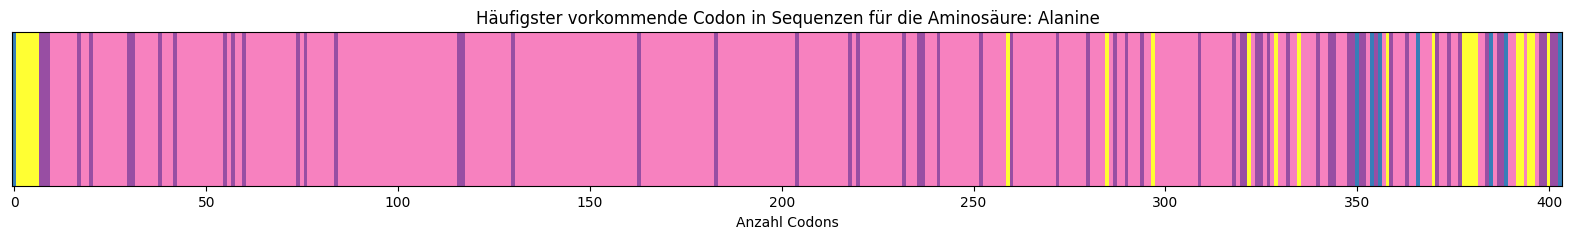

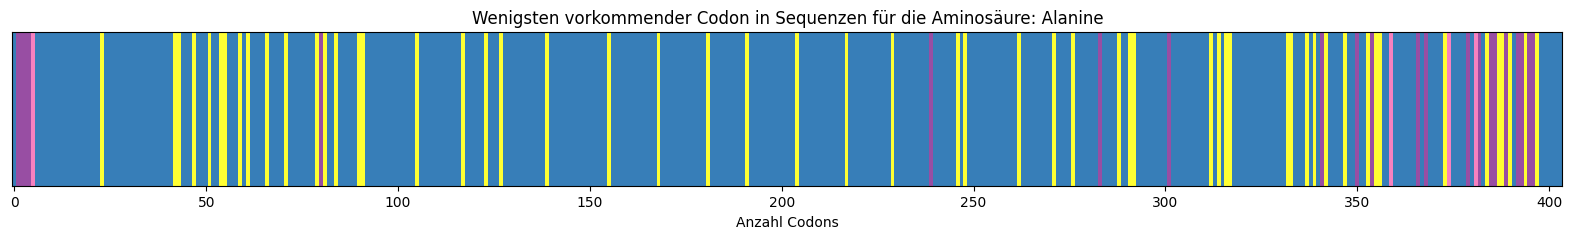

In [21]:
def visualize_mpl(records, selected_aa, show_records, len_threshold=1.3):
    color_matrix = []

    max_len = max(len(record) for record in records) // 3
    avg_len = (sum(len(record) for record in records) // 3) / len(records)
    len_threshold = int(avg_len * len_threshold)

    print("max_len", max_len, "avg_len", len_threshold)

    for record in records[:show_records]:
        #if len(record) is a outlier, we can skip it:
        if len(record) // 3 > len_threshold:
            continue

        selected_codons = translation_table[selected_aa]
        codons = [record[i:i + 3] for i in range(0, len(record), 3)]
        codon_ids = [selected_codons.index(c) if c in selected_codons else -1 for c in codons]

        color_out_of_reach = 1000
        # Create a list to hold the color indices for each codon
        color_indices = [idx + 1 if idx >= 0 else color_out_of_reach for idx in codon_ids]

        # Pad color_indices with -1 to make it the same length as max_len
        color_indices += [color_out_of_reach] * (len_threshold - len(color_indices))


        color_matrix.append(color_indices)


    # create a plot where the color, color index and the selected_codons is shown
    print(translation_table[selected_aa])
    # get used color for each codon
    color_dict = {idx: color for idx, color in enumerate(translation_table[selected_aa])}
    print(color_dict)

    # Convert color_matrix to a 2D numpy array
    color_matrix = np.array(color_matrix)
    print(color_matrix.shape)
    # color matrix to dataframe
    df = pd.DataFrame(color_matrix)
    # for each position in the matrix, we want to count the number of times a color appears
    color_counts = df.apply(pd.Series.value_counts, axis=0).fillna(0)
    # drop the last which is the padding
    color_counts = color_counts.drop(color_out_of_reach)
    # create a list with colors for each column with the highest count
    color_max = color_counts.idxmax()
    # plot color_counts
    plt.figure(figsize=(20, 2))
    plt.imshow([color_max], aspect='auto', cmap='Set1', vmin=0, vmax=5)
    plt.xlabel('Anzahl Codons')
    plt.title('Häufigster vorkommende Codon in Sequenzen für die Aminosäure: Alanine')
    plt.yticks([])  # Hide y-axis ticks
    plt.show()

    color_min = color_counts.idxmin()
    # plot color_counts
    plt.figure(figsize=(20, 2))
    plt.imshow([color_min], aspect='auto', cmap='Set1', vmin=0, vmax=5)
    plt.xlabel('Anzahl Codons')
    plt.title('Wenigsten vorkommender Codon in Sequenzen für die Aminosäure: Alanine')
    plt.yticks([])  # Hide y-axis ticks
    plt.show()


visualize_mpl(records, show_records=len(records), selected_aa="A")

max_len 2359 avg_len 404
['GCT', 'GCC', 'GCA', 'GCG']
{0: 'GCT', 1: 'GCC', 2: 'GCA', 3: 'GCG'}
(3217, 404)
0      1
1      3
2      3
3      3
4      3
      ..
399    2
400    3
401    2
402    2
403    1
Length: 404, dtype: int32
(3217, 404)
{0: 'GCT', 1: 'GCC', 2: 'GCA', 3: 'GCG'}


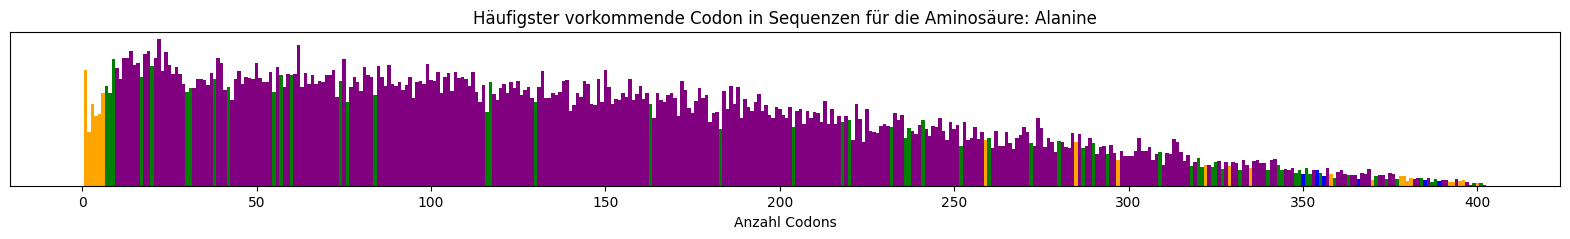

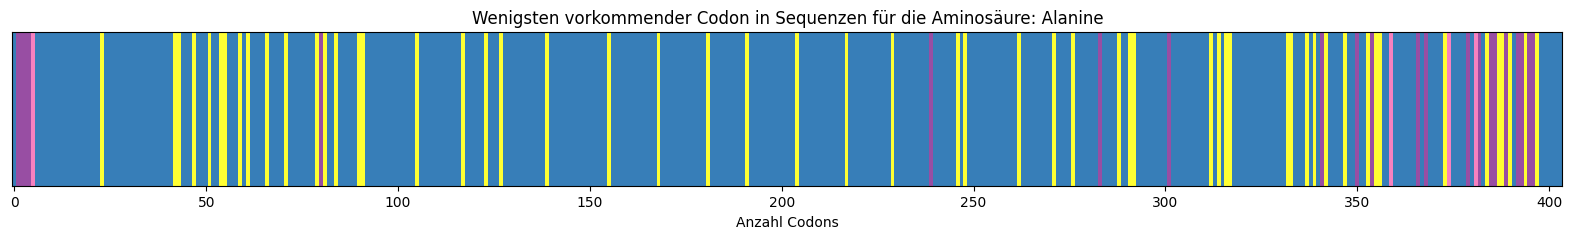

In [59]:
def visualize_mpl(records, selected_aa, show_records, len_threshold=1.3):
    color_matrix = []

    max_len = max(len(record) for record in records) // 3
    avg_len = (sum(len(record) for record in records) // 3) / len(records)
    len_threshold = int(avg_len * len_threshold)

    print("max_len", max_len, "avg_len", len_threshold)

    for record in records[:show_records]:
        #if len(record) is a outlier, we can skip it:
        if len(record) // 3 > len_threshold:
            continue

        selected_codons = translation_table[selected_aa]
        codons = [record[i:i + 3] for i in range(0, len(record), 3)]
        codon_ids = [selected_codons.index(c) if c in selected_codons else -1 for c in codons]

        color_out_of_reach = 1000
        # Create a list to hold the color indices for each codon
        color_indices = [idx + 1 if idx >= 0 else color_out_of_reach for idx in codon_ids]

        # Pad color_indices with -1 to make it the same length as max_len
        color_indices += [color_out_of_reach] * (len_threshold - len(color_indices))


        color_matrix.append(color_indices)


    # create a plot where the color, color index and the selected_codons is shown
    print(translation_table[selected_aa])
    # get used color for each codon
    color_dict = {idx: color for idx, color in enumerate(translation_table[selected_aa])}
    print(color_dict)

    # Convert color_matrix to a 2D numpy array
    color_matrix = np.array(color_matrix)
    print(color_matrix.shape)
    # color matrix to dataframe
    df = pd.DataFrame(color_matrix)
    # for each position in the matrix, we want to count the number of times a color appears
    color_counts = df.apply(pd.Series.value_counts, axis=0).fillna(0)
    # drop the last which is the padding
    color_counts = color_counts.drop(color_out_of_reach)
    # create a list with colors for each column with the highest count
    color_max = color_counts.idxmax()
    # list with the count of the highest count
    count_max = color_counts.max()
    print(color_max)
    print(df.shape)

    print(color_dict)
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']
    #colors = colors[:len(color_dict)]
    # plot color_counts
    plt.figure(figsize=(20, 2))
    # bar plot where the count_max is shown and the color is the color_max
    plt.bar(range(len(count_max)), list(count_max), color=[colors[idx] for idx in color_max], width=1)
    plt.xlabel('Anzahl Codons')
    plt.title('Häufigster vorkommende Codon in Sequenzen für die Aminosäure: Alanine')
    plt.yticks([])  # Hide y-axis ticks
    plt.show()

    color_min = color_counts.idxmin()
    # plot color_counts
    plt.figure(figsize=(20, 2))
    #create a bar plot where the color shows the minimum count
    plt.imshow([color_min], aspect='auto', cmap='Set1', vmin=0, vmax=5)
    plt.xlabel('Anzahl Codons')
    plt.title('Wenigsten vorkommender Codon in Sequenzen für die Aminosäure: Alanine')
    plt.yticks([])  # Hide y-axis ticks
    plt.show()


visualize_mpl(records, show_records=len(records), selected_aa="A")

max_len 2359 avg_len 404
(19, 3217, 404)
(3217, 404)


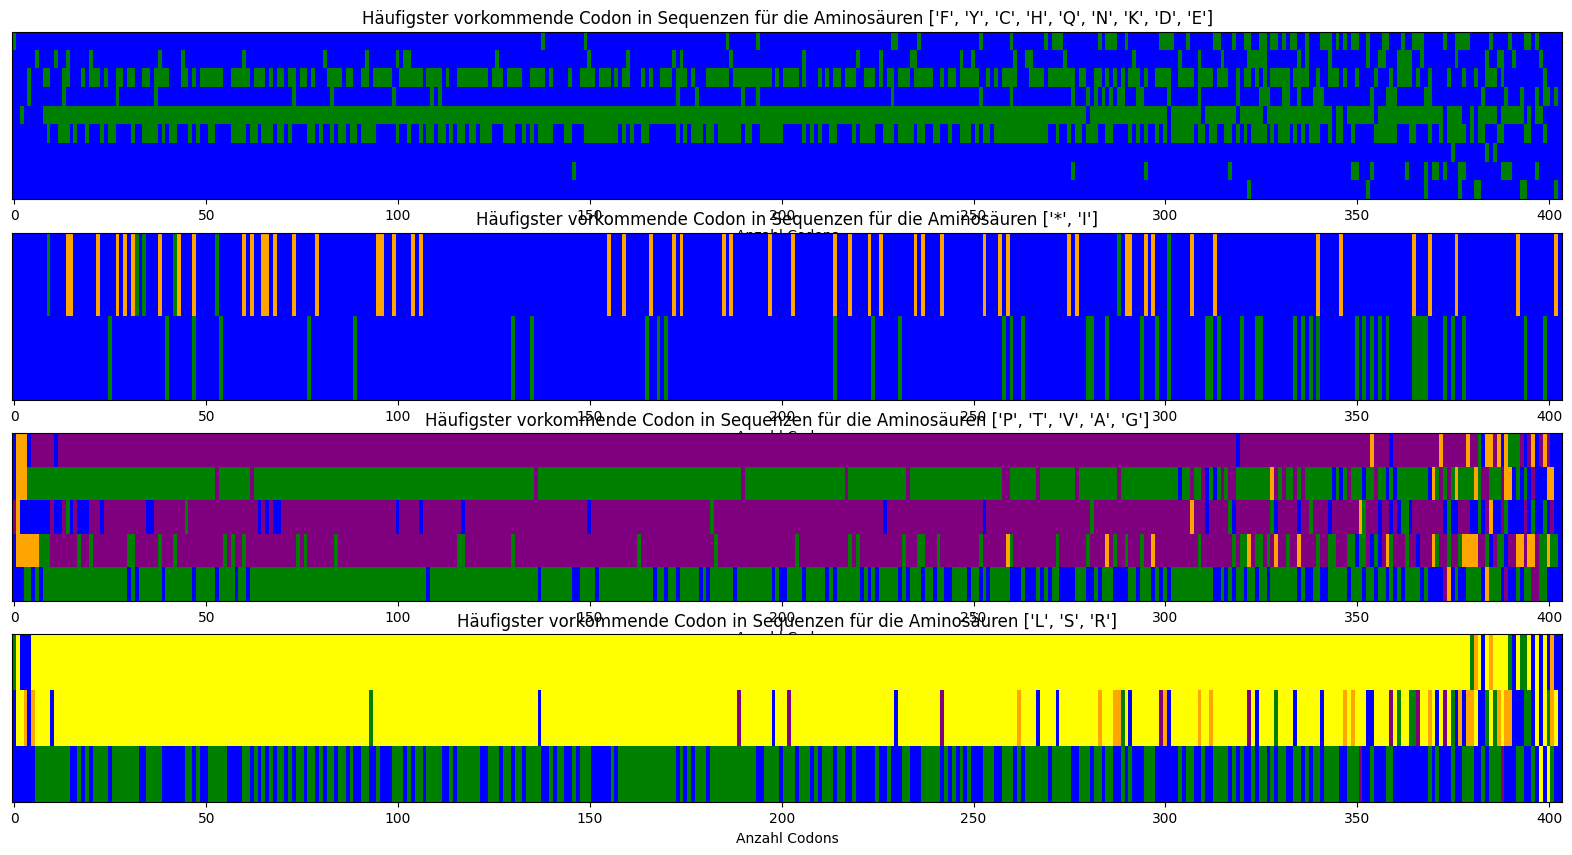

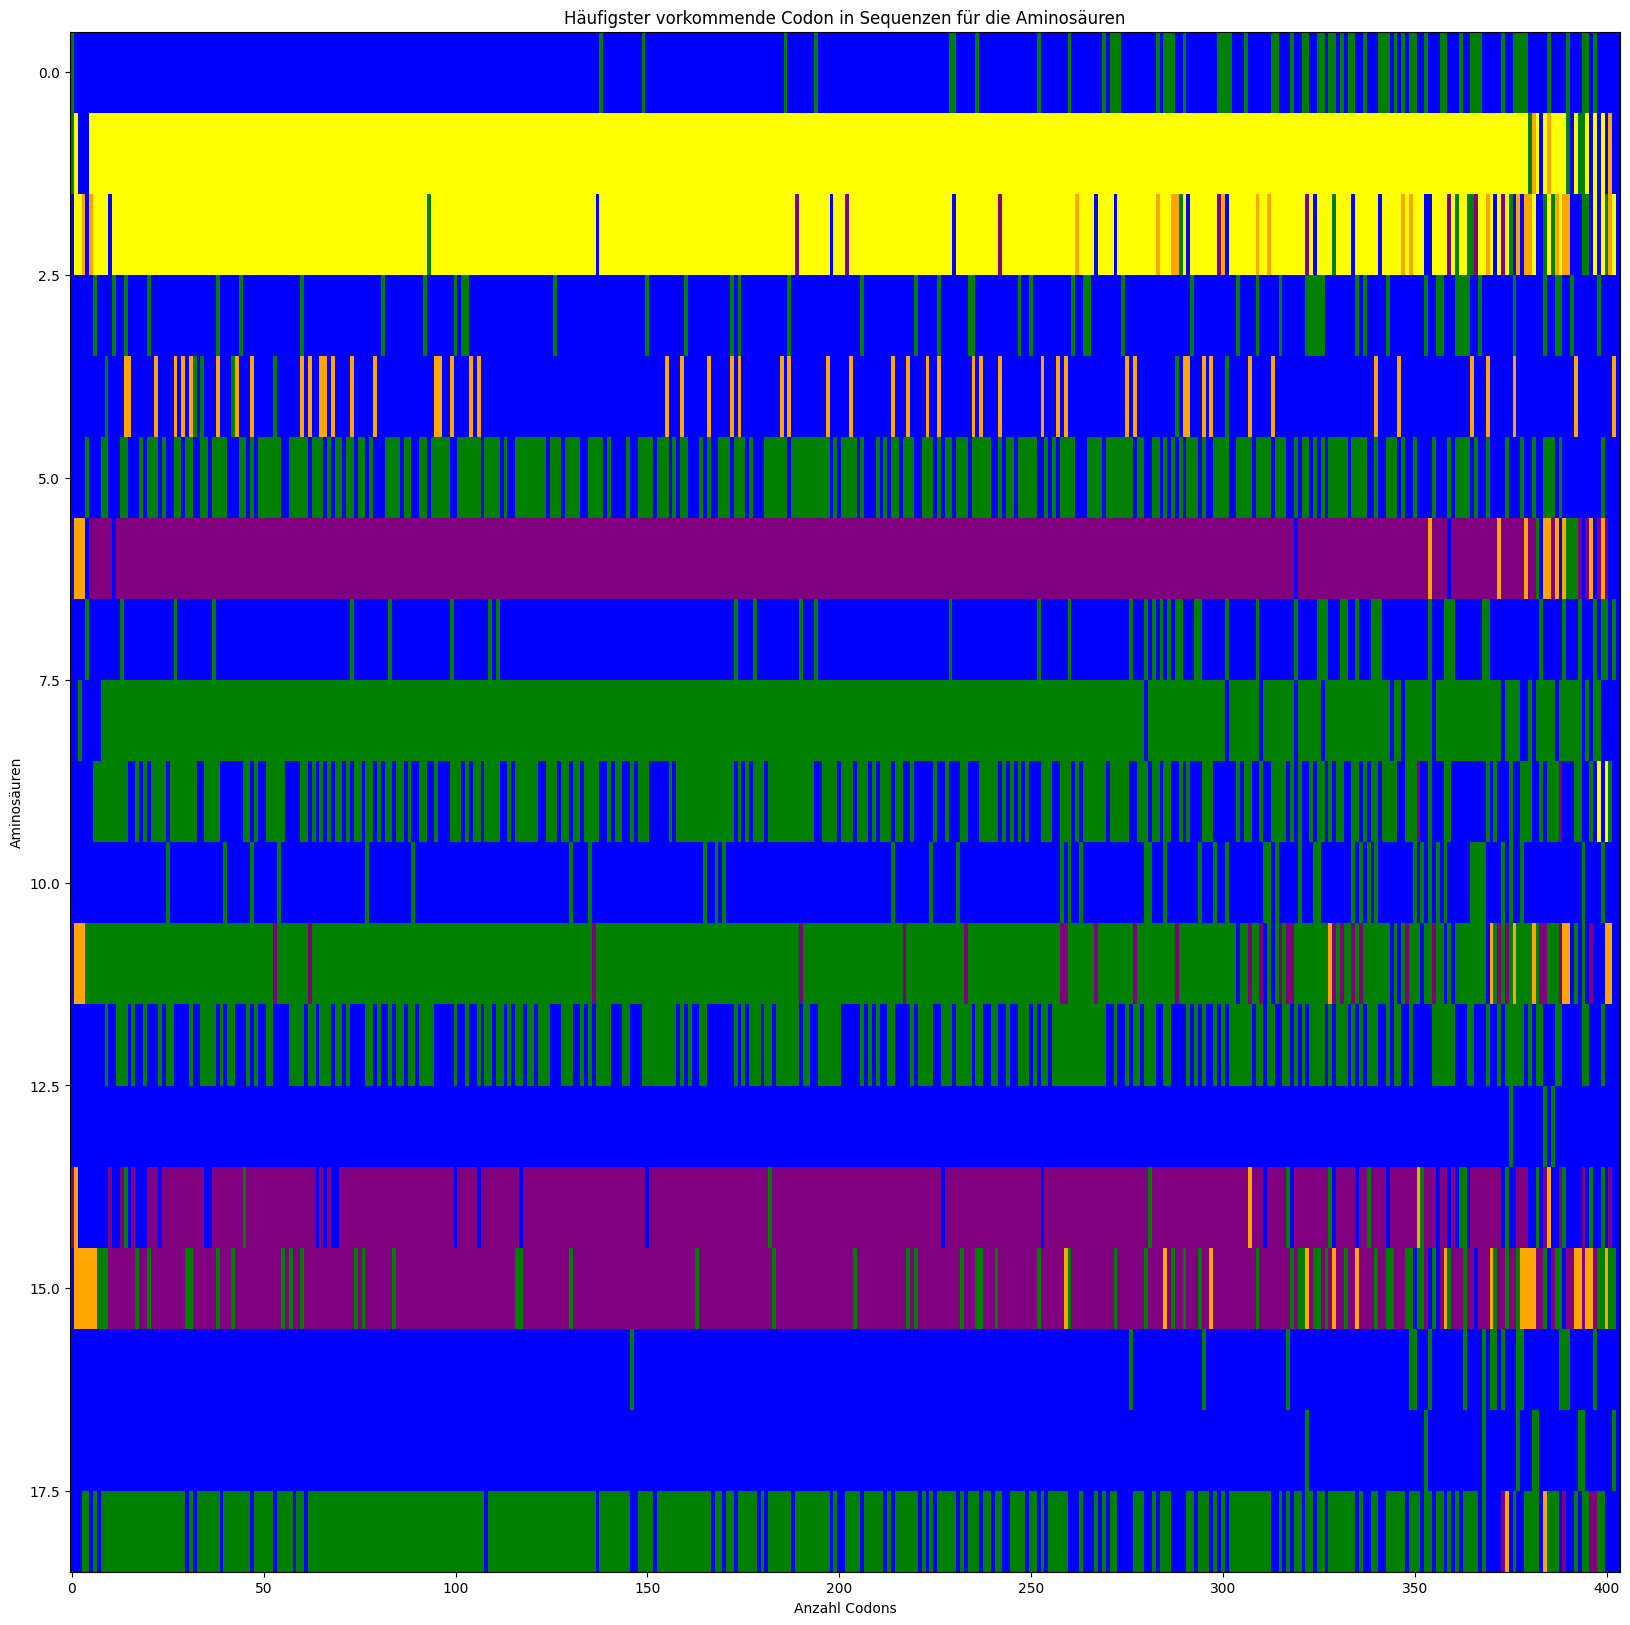

In [89]:
def visualize_mpl(records, selected_aa, show_records, len_threshold=1.3):
    color_matrix_all = []
    color_out_of_reach = 1000

    max_len = max(len(record) for record in records) // 3
    avg_len = (sum(len(record) for record in records) // 3) / len(records)
    len_threshold = int(avg_len * len_threshold)

    print("max_len", max_len, "avg_len", len_threshold)

    
    for aa in selected_aa:
        color_matrix = []
        for record in records[:show_records]:
            #if len(record) is a outlier, we can skip it:
            if len(record) // 3 > len_threshold:
                continue

            selected_codons = translation_table[aa]
            codons = [record[i:i + 3] for i in range(0, len(record), 3)]
            codon_ids = [selected_codons.index(c) if c in selected_codons else -1 for c in codons]

            # Create a list to hold the color indices for each codon
            color_indices = [idx + 1 if idx >= 0 else color_out_of_reach for idx in codon_ids]
            # Pad color_indices with -1 to make it the same length as max_len
            color_indices += [color_out_of_reach] * (len_threshold - len(color_indices))

            color_matrix.append(color_indices)
        color_matrix_all.append(color_matrix)

    # Convert color_matrix to a 3D numpy array
    color_matrix_all = np.array(color_matrix_all)
    print(color_matrix_all.shape)
    print(color_matrix_all[0].shape)

    color_maxs = []
    count_maxs = []
    for c_matrix in color_matrix_all:
        # color matrix to dataframe
        df =pd.DataFrame(c_matrix)
        # for each position in the matrix, we want to count the number of times a color appears
        color_counts = df.apply(pd.Series.value_counts, axis=0).fillna(0)
        # drop the last which is the padding
        color_counts = color_counts.drop(color_out_of_reach)

        color_maxs.append(color_counts.idxmax())
        count_maxs.append(color_counts.max())

    color_maxs_matrix = np.array(color_maxs)

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']
    # create cmap
    cmap = mpl.colors.ListedColormap(colors)

    # print the different codons for each selected_aa with translation_table


    #subplots
    #fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    # group color_maxs by codon availablity


    grouped_aa = {}
    for aa in selected_aa:
        key = len(translation_table[aa])
        if key not in grouped_aa:
            grouped_aa[key] = [aa]
        else:
            grouped_aa[key].append(aa)
    
    # sort grouped_aa based on key number
    sorted_aa = sorted(grouped_aa.items(), key=lambda x: x[0])

    #subplots for each group
    fig, ax = plt.subplots(len(grouped_aa), 1, figsize=(20, 10))
    ax = ax.flatten()  # Flatten the array to make indexing easier
    for idx, (key, aa_list) in enumerate(sorted_aa):
        color_maxs_matrix_group = color_maxs_matrix[[selected_aa.index(aa) for aa in aa_list]]
        ax[idx].imshow(color_maxs_matrix_group, aspect='auto', cmap=cmap, vmin=0, vmax=5)
        ax[idx].set_xlabel('Anzahl Codons')
        ax[idx].set_title(f'Häufigster vorkommende Codon in Sequenzen für die Aminosäuren {aa_list}')
        ax[idx].set_yticks([])  # Hide y-axis ticks
    plt.show()

    # plot color_counts
    plt.figure(figsize=(20, 20))
    # bar plot where the count_max is shown and the color is the color_max
    plt.imshow(color_maxs_matrix, aspect='auto', cmap=cmap, vmin=0, vmax=5)
    plt.xlabel('Anzahl Codons')
    plt.ylabel('Aminosäuren')
    plt.title(f'Häufigster vorkommende Codon in Sequenzen für die Aminosäuren')
    #plt.yticks([])  # Hide y-axis ticks
    plt.show()


# get all amino acids from the translation table if more than 1 codon is available
selected_aa = [aa for aa, codons in translation_table.items() if len(codons) > 1]
visualize_mpl(records, show_records=len(records), selected_aa=selected_aa)

max_len 2359 avg_len 404
(19, 3217, 404)
(3217, 404)
selected_aa: F, codons: ['TTT', 'TTC']
selected_aa: L, codons: ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG']
selected_aa: S, codons: ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC']
selected_aa: Y, codons: ['TAT', 'TAC']
selected_aa: *, codons: ['TAA', 'TAG', 'TGA']
selected_aa: C, codons: ['TGT', 'TGC']
selected_aa: P, codons: ['CCT', 'CCC', 'CCA', 'CCG']
selected_aa: H, codons: ['CAT', 'CAC']
selected_aa: Q, codons: ['CAA', 'CAG']
selected_aa: R, codons: ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG']
selected_aa: I, codons: ['ATT', 'ATC', 'ATA']
selected_aa: T, codons: ['ACT', 'ACC', 'ACA', 'ACG']
selected_aa: N, codons: ['AAT', 'AAC']
selected_aa: K, codons: ['AAA', 'AAG']
selected_aa: V, codons: ['GTT', 'GTC', 'GTA', 'GTG']
selected_aa: A, codons: ['GCT', 'GCC', 'GCA', 'GCG']
selected_aa: D, codons: ['GAT', 'GAC']
selected_aa: E, codons: ['GAA', 'GAG']
selected_aa: G, codons: ['GGT', 'GGC', 'GGA', 'GGG']


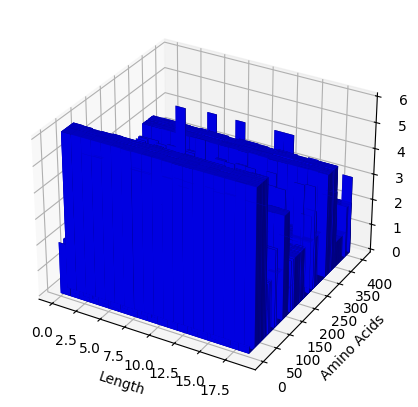

In [80]:
def visualize_mpl(records, selected_aa, show_records, len_threshold=1.3):
    color_matrix_all = []
    color_out_of_reach = 1000

    max_len = max(len(record) for record in records) // 3
    avg_len = (sum(len(record) for record in records) // 3) / len(records)
    len_threshold = int(avg_len * len_threshold)

    print("max_len", max_len, "avg_len", len_threshold)

    
    for aa in selected_aa:
        color_matrix = []
        for record in records[:show_records]:
            #if len(record) is a outlier, we can skip it:
            if len(record) // 3 > len_threshold:
                continue

            selected_codons = translation_table[aa]
            codons = [record[i:i + 3] for i in range(0, len(record), 3)]
            codon_ids = [selected_codons.index(c) if c in selected_codons else -1 for c in codons]

            # Create a list to hold the color indices for each codon
            color_indices = [idx + 1 if idx >= 0 else color_out_of_reach for idx in codon_ids]
            # Pad color_indices with -1 to make it the same length as max_len
            color_indices += [color_out_of_reach] * (len_threshold - len(color_indices))

            color_matrix.append(color_indices)
        color_matrix_all.append(color_matrix)

    # Convert color_matrix to a 3D numpy array
    color_matrix_all = np.array(color_matrix_all)
    print(color_matrix_all.shape)
    print(color_matrix_all[0].shape)

    color_maxs = []
    count_maxs = []
    for c_matrix in color_matrix_all:
        # color matrix to dataframe
        df =pd.DataFrame(c_matrix)
        # for each position in the matrix, we want to count the number of times a color appears
        color_counts = df.apply(pd.Series.value_counts, axis=0).fillna(0)
        # drop the last which is the padding
        color_counts = color_counts.drop(color_out_of_reach)

        color_maxs.append(color_counts.idxmax())
        count_maxs.append(color_counts.max())

    color_maxs_matrix = np.array(color_maxs)

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']
    # create cmap
    cmap = mpl.colors.ListedColormap(colors)

    # print the different codons for each selected_aa with translation_table
    for idx, aa in enumerate(selected_aa):
        print(f"selected_aa: {aa}, codons: {translation_table[aa]}")



    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')

    # Assuming that 'amino_acids' is a list of amino acids corresponding to the color_maxs
    amino_acids = list(range(len(color_maxs_matrix)))  # replace this with your list of amino acids

    xpos = np.arange(len(color_maxs_matrix))
    ypos = np.arange(len(color_maxs_matrix[0]))
    xpos, ypos = np.meshgrid(xpos, ypos)
    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros_like(xpos)

    dx = dy = np.ones_like(zpos)
    dz = color_maxs_matrix.flatten()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b')

    ax.set_xlabel('Length')
    ax.set_ylabel('Amino Acids')
    ax.set_zlabel('Max Counts')

    plt.show()


# get all amino acids from the translation table if more than 1 codon is available
selected_aa = [aa for aa, codons in translation_table.items() if len(codons) > 1]
visualize_mpl(records, show_records=len(records), selected_aa=selected_aa)

In [14]:
# TODO: plot above to a matrix plot for different amino acids


def visualize_mpl(records, selected_aa, show_records, len_threshold=1.3):
    color_matrix = []

    max_len = max(len(record) for record in records) // 3
    avg_len = (sum(len(record) for record in records) // 3) / len(records)
    len_threshold = int(avg_len * len_threshold)

    print("max_len", max_len, "avg_len", len_threshold)

    for record in records[:show_records]:
        #if len(record) is a outlier, we can skip it:
        if len(record) // 3 > len_threshold:
            continue

        selected_codons = []
        for aa in selected_aa:
            selected_codons.apend(translation_table[aa])
            
        codons = [record[i:i + 3] for i in range(0, len(record), 3)]
        codon_ids = [selected_codons.index(c) if c in selected_codons else -1 for c in codons]

        color_out_of_reach = 1000
        # Create a list to hold the color indices for each codon
        color_indices = [idx + 1 if idx >= 0 else color_out_of_reach for idx in codon_ids]

        # Pad color_indices with -1 to make it the same length as max_len
        color_indices += [color_out_of_reach] * (len_threshold - len(color_indices))


        color_matrix.append(color_indices)


    # Convert color_matrix to a 2D numpy array
    color_matrix = np.array(color_matrix)

    # Plotting
    plt.figure(figsize=(20, 5))
    plt.imshow(color_matrix, aspect='auto', cmap='Set1', vmin=0, vmax=5)
    plt.xlabel('Anzahl Codons')
    plt.title('Verteilung der Codons einer Sequenz für die Aminosäure: Alanine')
    plt.yticks([])  # Hide y-axis ticks
    plt.show()

visualize_mpl(records, show_records=100, selected_aa=["A", "F", "L", "S"])

max_len 2359 avg_len 404


AttributeError: 'list' object has no attribute 'apend'